# Project Objective

The main purpose of the project is to predict whether a given text represents hate speech and classify it in the face of a tweet or comment.

# Libraries Import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
from IPython.display import display
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, Bidirectional,Embedding,Flatten,GRU
from tensorflow.keras.optimizers import SGD,RMSprop
from pandas.core.common import random_state

# Get Data

In [ ]:
# load dev data from tsv
# load train data from tsv
# load test data from tsv
dev = pd.read_csv('/dev_en.tsv', sep='\t')
train = pd.read_csv('/train_en.tsv', sep='\t')
test = pd.read_csv('/test_en.tsv', sep='\t', header=None, names=['id', 'text', 'HS', 'TR', 'AG'])


In [ ]:
train.shape

(9000, 5)

In [ ]:
test.shape

(2971, 5)

# Descriptive analysis of the dataset


In this section, We will conduct descriptive analysis of the datasets to provide a good understanding of data characteristics.

## Have an initial inspection of the data.

In [ ]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break

print('\nInformation of the dev dataset...... \n')
print(dev.info())
print('\nColumn names of the dataset...... \n', dev.columns)


print('\nBelow is the first few lines of the dataset......\n', dev.head(10))
print('\nBelow is the last few lines of the dataset......\n', dev.tail(10))
print('\nBelow is the statistics of the dataset......\n', dev.describe())


Information of the dev dataset...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   text    1000 non-null   object
 2   HS      1000 non-null   int64 
 3   TR      1000 non-null   int64 
 4   AG      1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None

Column names of the dataset...... 
 Index(['id', 'text', 'HS', 'TR', 'AG'], dtype='object')

Below is the first few lines of the dataset......
       id                                                                                                                                                                                                                                                                  text  HS  TR  AG
0  18201  I swear I’m getting to places just in the nick of time! It’s exhausting @Sam_Schulman RT @MaireadEvvoMc: Made

In [ ]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break

print('\nInformation of the train dataset...... \n')
print(train.info())
print('\nColumn names of the dataset...... \n', train.columns)


print('\nBelow is the first few lines of the dataset......\n', train.head(10))
print('\nBelow is the last few lines of the dataset......\n', train.tail(10))
print('\nBelow is the statistics of the dataset......\n', train.describe())


Information of the train dataset...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9000 non-null   int64 
 1   text    9000 non-null   object
 2   HS      9000 non-null   int64 
 3   TR      9000 non-null   int64 
 4   AG      9000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 351.7+ KB
None

Column names of the dataset...... 
 Index(['id', 'text', 'HS', 'TR', 'AG'], dtype='object')

Below is the first few lines of the dataset......
     id                                                                                                                                                                                                                                                                                                          text  HS  TR  AG
0  201                                                                       

In [ ]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break

print('\nInformation of the test dataset...... \n')
print(test.info())
print('\nColumn names of the dataset...... \n', test.columns)


print('\nBelow is the first few lines of the dataset......\n', test.head(10))
print('\nBelow is the last few lines of the dataset......\n', test.tail(10))
print('\nBelow is the statistics of the dataset......\n', test.describe())


Information of the test dataset...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971 entries, 0 to 2970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2971 non-null   int64 
 1   text    2971 non-null   object
 2   HS      2971 non-null   int64 
 3   TR      2971 non-null   int64 
 4   AG      2971 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 116.2+ KB
None

Column names of the dataset...... 
 Index(['id', 'text', 'HS', 'TR', 'AG'], dtype='object')

Below is the first few lines of the dataset......
       id                                                                                                                                                                                                                                                       text  HS  TR  AG
0  31568                                                                                                                       

In [ ]:
# Label encodings
HS = {0: "not offensive", 1: "offensive"}
print(HS)

{0: 'not offensive', 1: 'offensive'}


## Train VS Test datasets

### Dimensions

Let’s check dimensions of the train and test dataset.

In [ ]:
train.shape, test.shape , dev.shape

((9000, 5), (2971, 5), (1000, 5))

Train set has 9000 texts and test set has 2971 texts and Vaild set has 1000 texts. LET'S GO DEEPER:

### Text length frequency

Now we will check the distribution of length of the texts in both train and test data.

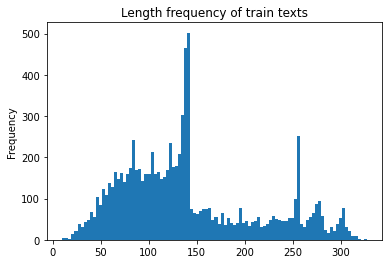

In [ ]:
train['text'].apply(len).plot(bins=100, kind = 'hist')
plt.title('Length frequency of train texts')
plt.show()

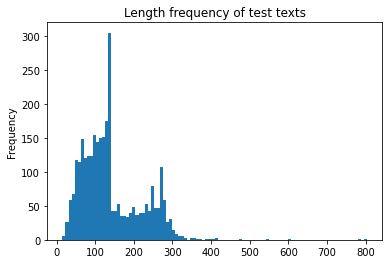

In [ ]:
test['text'].apply(len).plot(bins=100, kind = 'hist')
plt.title('Length frequency of test texts')
plt.show()

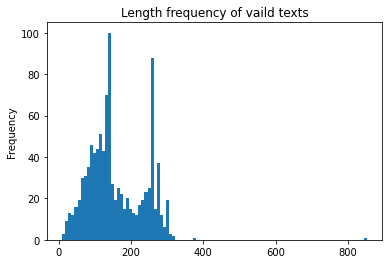

In [ ]:
dev['text'].apply(len).plot(bins=100, kind = 'hist')
plt.title('Length frequency of vaild texts')
plt.show()

The above histogram shows us the length frequency of the each text from the dataset. Most sentence lengths lie between 60-140.

### Duplicate Data

In [ ]:
# check duplicate data (train dataset)
train.drop_duplicates(inplace = True)
# check shape of data after drop a duplicate data
train.shape

(9000, 5)

In [ ]:
# check duplicate data (train dataset)
test.drop_duplicates(inplace = True)
# check shape of data after drop a duplicate data
test.shape

(2971, 5)

In [ ]:
# check duplicate data (vaild dataset)
dev.drop_duplicates(inplace = True)
# check shape of data after drop a duplicate data
dev.shape

(1000, 5)

Data doesn't contain duplicate values

## Normal VS Hate texts

In [ ]:
train[train['HS'] == 0].head(10)

,id,text,HS,TR,AG
3,204,NY Times: 'Nearly All White' States Pose 'an Array of Problems' for Immigrants https://t.co/ACZKLhdMV9 https://t.co/CJAlSXCzR6,0,0,0
4,205,"Orban in Brussels: European leaders are ignoring the will of the people, they do not want migrants https://t.co/NeYFyqvYlX",0,0,0
6,207,"@RitaPanahi @826Maureen @RealCandaceO Antifa are just a pack of druggie misfits that no one loves, being the violent thugs they are is their cry for attention and their hit of self importance.#JuvenileDelinquents",0,0,0
7,208,Ex-Teacher Pleads Not guilty To Rape Charges https://t.co/D2mGu3VT5G,0,0,0
8,209,still places on our Bengali (Sylheti) class! it's London's 2nd language! know anyone interested @SBSisters @refugeecouncil @DocsNotCops https://t.co/sOx6shjvMx,0,0,0
9,210,DFID Africa Regional Profile: July 2018 https://t.co/npfZCriW0w,0,0,0
10,211,Watch: Benjamin Netanyahu backs Trump's decision to cut aid to the Palestinians and UNRWA - Free Speech Time - https://t.co/SB843Zf0IF @ISupport_Israel,0,0,0
12,213,"While Costa Rica has received the most asylum claims, Panama, Mexico and the USA have also recorded a growing trend of claims by Nicaraguans in need of international refugee protection. https://t.co/pp7LgFikT1",0,0,0
13,214,"US immigrant policy to enter US has always been - education or skill &amp; sponsor to take responsibility 4 them. In last 30 yrs, US has taken in so many with no education or means to support themselves - many never learn English. With Catch &amp; Release too many go on welfare-",0,0,0
14,215,"Italy’s populist coalition poised to defy EU with plans to deport 500,000 migrants https://t.co/dNxnranpM6",0,0,0


In [ ]:
train[train['HS'] == 1].head(10)

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike",1,0,0
1,202,"Why would young fighting age men be the vast majority of the ones escaping a war &amp; not those who cannot fight like women, children, and the elderly?It's because the majority of the refugees are not actually refugees they are economic migrants trying to get into Europe.... https://t.co/Ks0SHbtYqn",1,0,0
2,203,"@KamalaHarris Illegals Dump their Kids at the border like Road Kill and Refuse to Unite! They Hope they get Amnesty, Free Education and Welfare Illegal #FamilesBelongTogether in their Country not on the Taxpayer Dime Its a SCAM #NoDACA #NoAmnesty #SendThe",1,0,0
5,206,@KurtSchlichter LEGAL is. Not illegal. #BuildThatWall,1,0,0
11,212,"@RealDonaldTrump @HouseGOP Illegals are dumping their kids heres o they can get welfare, aid and U.S School Ripping off U.S Taxpayers #SendThemBack ! Stop Alowing illegals to Abuse the Taxpayer #Immigration https://t.co/rItfeGcB5R via @BreitbartNews",1,0,1
15,216,"Lithuania, Romania aided CIA torture, top European Union court rules https://t.co/Xe5EDJp3jt EU court is a joke ! Why are they silent as Europe is being destroyed with FORCED islamist immigration...",1,0,1
16,217,"Worldbank reports that in the next 30 years many refugees have to leave her homeland, specially in Africa. Who will feed them ? Is Europe able to shoot them down and protect her own homeland, before it will destroyed from Africans ? https://t.co/gVBh2r9bes",1,0,1
17,218,Rich African Countries don't take in African MigrantsRich muslim countries don't take in muslim migrantsRich latin american countries don't take it latin migrantsBut white countries are suppose to accept them??,1,0,0
25,226,"@WattersWorld @JesseBWatters @BillSpadea How about discussing this? #JoeBiden's ""black box"" of American success. #WhiteGenocide #ImmigrationInvasion #JesseWatters #WatersWorldhttps://t.co/k8bWjj7tnp",1,0,1
27,228,EU’s hailed migrant plan ‘˜a road to Hell’ Czech Republic refuses involvement https://t.co/sIBKJA9Dfc,1,0,1


In [ ]:
test[test['HS'] == 0].head(10)

,id,text,HS,TR,AG
0,31568,"Bro is a bitch, fucking cunt https://t.co/dQ8JagmNCZ",0,0,0
2,31227,"@charliekirk11 @asia742 364 down only about 12,499,636 more to go!#BuildThatWall",0,0,0
3,31224,>Harasses women and calls them bitch and crabby >They block him >Plays the victim https://t.co/gmraGDtcQm,0,0,0
4,31139,"Bitch you ain't gotta call my phone, matter fact all you hoes can leave me alone!! 💯",0,0,0
7,32985,#FactCheck true #TuesdayThoughts #WalkAwayFromDemocrats #WakeUpAmerica #VoteDemsOut #RedWaveRising2018 #BuildTheWall #StopTheInvasion #ProtectOurChildren #NoAmnesty #EndSanctuaryCities #NoDACA #EndChainMigration #FixTheLaws #EndVisaLottery #Congress,0,0,0
8,30284,@GMA @TVMarci His own fault #SENDTHEMBACK,0,0,0
10,34098,@FoxNews @BarackObama Like he ever kept out any threats. He's lying as usual. #BuildThatWall,0,0,0
12,34138,He is a snake ass bitch. He is a fugly slut who shouldn't be trusted and I'm patiently waiting for him to be 18 cuz… https://t.co/NbezBfDPQ4,0,0,0
13,34165,"You seem like a hoe Ok bitch? Did I ever deny that? Nope, Next.",0,0,0
14,30974,@FoxNews @GOPLeader @MariaBartiromo This is a pretty sight #BuildThatWall,0,0,0


In [ ]:
test[test['HS'] == 1].head(10)

,id,text,HS,TR,AG
1,30734,I'm rewatching Breaking Bad & I could see why I hated this bitch the first time I watched this show; Skyler is such a cunt & a fake as wife,1,1,0
5,34076,@ABCPolitics A illegal aliens showing exactly what they were coming to this country for in the first place. #sendthemback!!!!!,1,0,1
6,32479,Bitch....how the fuck. Siri you a dumb ass hoe https://t.co/nldwbLrK10,1,1,0
9,30072,@christianllamar @LindseyGrahamSC stop w 'we have to worry about the children' No we do not-many R >20yrs old Go home and make your country better or enter ours legally #NoDACA we can't afford them,1,0,0
11,33818,"Im going to explode if I have to listen to these entitled, privileged cunts bitch for ONE MORE SECOND about their inconvenient FREE flights",1,0,0
17,32162,Argentina imported tons of Mestizos and they went from a first world country to another third world Latin American shithole. This is what's in store for America if we #AbolishICE. #BuildTheDamnWall #DeportThemAll #SupportICE #KAG,1,0,0
19,31484,Open your mouth & take the meat like a hoe you bitch ass,1,1,1
20,31961,"& for the hoe that think she don't do what the dummies do... you's a dummy bitch, and a ugly one at that! 🚮",1,1,0
26,33238,is PROOF that theyre more privleged. also my bitch mother wont bring my pizza rolls up here like the lazy cunt she is so brb.,1,1,0
27,31004,Tell that bitch to pay me if she EVER tryna rape me,1,1,0


In [ ]:
dev[dev['HS'] == 0].head(10)

,id,text,HS,TR,AG
0,18201,"I swear I’m getting to places just in the nick of time! It’s exhausting @Sam_Schulman RT @MaireadEvvoMc: Made your bed, now lie in the flea pit you created 'Tourists go home, refugees welcome': why Barcelona chose migrants over visitors https://t.co/gtLMcuFC5p",0,0,0
1,18202,"I’m an immigrant — and Trump is right on immigration - https://t.co/Pldngi5fmv...⁦@matt_cam⁩, can you give you insights on this story? https://t.co/DjuIzVb2oN",0,0,0
4,18205,Worker Charged With Sexually Molesting Eight Children at Immigrant Shelter https://t.co/N2nnTiJ2ig,0,0,0
5,18206,"UN picks refugees for UK, picks mostly Syrian Muslims https://t.co/0jRjXVsuEX https://t.co/Qq99l6SaVz",0,0,0
6,18207,"@htTweets Delhi will be much better under Prez Rule,than being under this Anarchist ,who doesn't believe in conciliatory or consensus building.JUST WISH TO FOLLOW EITHER MY WAY OR NO WAY. Have reduced Delhi to slum by encouraging squatters,illegal migrant",0,0,0
7,18208,Global Compact on Migration moves forward https://t.co/cDH8MvNynx #WithRefugees #GlobalCompact @RCKDirector @refugeeaffairs @UNHCR_Kenya @drckenya @tyrusmaina,0,0,0
8,18209,"Violence toward tourists in Barcelona, Spain -- ""Tourists Go Home"" "" Refugees Welcome"". @VisitBCN_EN @visitcatalonia https://t.co/KZIEpzeQ4w",0,0,0
9,18210,"Immigration decline costing UK economy billions, says think thank | The Independent - https://t.co/afUV2Rn81v",0,0,0
13,18214,Libyan coast guard rescues some 160 #Europe-bound migrants https://t.co/jgMZ1Bb2oT,0,0,0
16,18217,Our Immigration Legal Services department is now accepting new clients! Please call (773) 583-9191 or stop by our office between 10-2 to request an intake appointment! https://t.co/RDl6rSPdNi,0,0,0


In [ ]:
dev[dev['HS'] == 1].head(10)

,id,text,HS,TR,AG
2,18203,"#IllegalImmigrants #IllegalAliens #ElectoralSystem #ElectoralCollege I’m going to shock some people here: America is NOT a #Democracy, America is a #Republic. Even more defined America is a Representative Republic. In a TRUE... https://t.co/kcZqVEaR93",1,0,1
3,18204,@DRUDGE_REPORT We have our own invasion issues with Mexicans. #BuildThatWall,1,0,1
10,18211,@NBCPolitics @MSNBC After 20 days in jail the kids of the illigal refugees must get free. Than nobody should care to them and give them food. The only chance the whole familiy can go home and leave the USA. And sure it must made a supoer big wall to prote,1,0,1
11,18212,@CBPArizona This is insane. 125 last weekend. #BuildThatWall !Arizona invasion @realDonaldTrump @dougducey,1,0,1
12,18213,"Reality Nike, He Did It, unlike you and all your groupies, never buy your product again, enough is enough, ugly crap you are doing here @potus @realDonaldTrump #BuildTheWall #LockThemUp #EndDACA #BoycottNFL #BoycottNike enough already, love my FLAG !!!!",1,0,0
14,18215,We need to encourage President Trump to keep trying to ban more refugees. https://t.co/HWyN4kAglZ,1,0,0
15,18216,Watch: Bangladeshi immigrant thinks he is above the law in Sweden - Free Speech Time - https://t.co/RZquRKAqTv @ISupport_Israel,1,0,0
23,18224,@lilmaggie186 @Jim_Jordan Illegals too? #BuildThatWall #AmericaFirst God Bless America and @POTUS,1,0,0
24,18225,"France adopts tough new law on asylum, immigration https://t.co/Cy7kZorCgb",1,0,1
28,18229,Lost - but happy ! Merkel co. has not realized who the reality really is. Poor Germany which want go on to love refugees. https://t.co/cqDtwYUaVU,1,0,0


## HS distribution

In [ ]:
train_counts = pd.DataFrame({
    'HS': train['HS'].value_counts().index,
    'Count': train['HS'].value_counts().values,
    'Percentage':  train['HS'].value_counts().values/train.shape[0]
})

display(train_counts)

,HS,Count,Percentage
0,0,5217,0.579667
1,1,3783,0.420333


In [ ]:
# get percentages
pos_tweet = train['HS'].value_counts()[0]
neg_tweet = train['HS'].value_counts()[1]

total = len(train)

print("percentage of positive texts : ", (pos_tweet/total)*100)
print("percentage of negative texts : ", (neg_tweet/total)*100)

percentage of positive texts :  57.96666666666667
percentage of negative texts :  42.03333333333333


In [ ]:
dev_counts = pd.DataFrame({
    'HS': dev['HS'].value_counts().index,
    'Count': dev['HS'].value_counts().values,
    'Percentage':  dev['HS'].value_counts().values/dev.shape[0]
})

display(dev_counts)

,HS,Count,Percentage
0,0,573,0.573
1,1,427,0.427


In [ ]:
# get percentages
pos_tweet = dev['HS'].value_counts()[0]
neg_tweet = dev['HS'].value_counts()[1]

total = len(dev)

print("percentage of positive texts : ", (pos_tweet/total)*100)
print("percentage of negative texts : ", (neg_tweet/total)*100)

percentage of positive texts :  57.3
percentage of negative texts :  42.699999999999996


From above, Hate speech accounts for about 42 percent of texts.

## Text length analysis

### Average Text Length

In [ ]:
train['pre_dataclean_len']=  [len(t) for t in train.text]
train

,id,text,HS,TR,AG,pre_dataclean_len
0,201,"Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike",1,0,0,121
1,202,"Why would young fighting age men be the vast majority of the ones escaping a war &amp; not those who cannot fight like women, children, and the elderly?It's because the majority of the refugees are not actually refugees they are economic migrants trying to get into Europe.... https://t.co/Ks0SHbtYqn",1,0,0,300
2,203,"@KamalaHarris Illegals Dump their Kids at the border like Road Kill and Refuse to Unite! They Hope they get Amnesty, Free Education and Welfare Illegal #FamilesBelongTogether in their Country not on the Taxpayer Dime Its a SCAM #NoDACA #NoAmnesty #SendThe",1,0,0,255
3,204,NY Times: 'Nearly All White' States Pose 'an Array of Problems' for Immigrants https://t.co/ACZKLhdMV9 https://t.co/CJAlSXCzR6,0,0,0,126
4,205,"Orban in Brussels: European leaders are ignoring the will of the people, they do not want migrants https://t.co/NeYFyqvYlX",0,0,0,122
...,...,...,...,...,...,...
8995,9196,@mmdwriter @JRubinBlogger @BenSasse I am proud to be a hysterical woman.,0,0,0,73
8996,9197,@CheriJacobus Hollywood is complicit in the rape and sexual assault of women for over 20 years.,0,0,0,95
8997,9198,@amaziah_filani What a fucking cunt I hate seeing kids getting neglected and used as parents experiment. So fucking sad. I tell you if I ever saw this whore Id definitely hurt her.,1,1,1,180
8998,9199,Hysterical woman like @CoryBooker,0,0,0,33


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


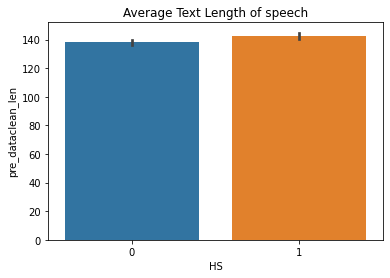

In [ ]:
sns.barplot('HS','pre_dataclean_len', data = train)
plt.title('Average Text Length of speech')
plt.show()

In [ ]:
test['pre_dataclean_len']=  [len(t) for t in test.text]
test

,id,text,HS,TR,AG,pre_dataclean_len
0,31568,"Bro is a bitch, fucking cunt https://t.co/dQ8JagmNCZ",0,0,0,52
1,30734,I'm rewatching Breaking Bad & I could see why I hated this bitch the first time I watched this show; Skyler is such a cunt & a fake as wife,1,1,0,139
2,31227,"@charliekirk11 @asia742 364 down only about 12,499,636 more to go!#BuildThatWall",0,0,0,80
3,31224,>Harasses women and calls them bitch and crabby >They block him >Plays the victim https://t.co/gmraGDtcQm,0,0,0,107
4,31139,"Bitch you ain't gotta call my phone, matter fact all you hoes can leave me alone!! 💯",0,0,0,84
...,...,...,...,...,...,...
2966,34170,Fanna start traveling bitch. Haha you hoes can't do that 🤗,1,1,0,58
2967,33757,"Do something about this immediately, @realDonaldTrump. This is a national security crisis. #DeportIllegalAliens #EndChainMigration",1,0,1,130
2968,34470,"If I trick a bitch and let her think I'm Obamaa to fuck, is that rape? https://t.co/XqnH8aD0pD",1,0,1,94
2969,33014,#stopimmigration#banislam#Merkelmussweg #FuckEUNot far right but Damn right !,1,0,1,77


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


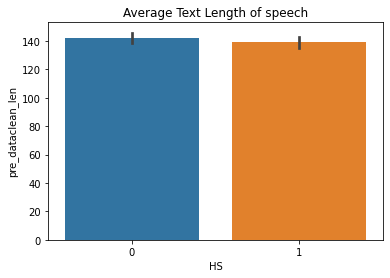

In [ ]:
sns.barplot('HS','pre_dataclean_len', data = test)
plt.title('Average Text Length of speech')
plt.show()

In [ ]:
dev['pre_dataclean_len']=  [len(t) for t in dev.text]
dev

,id,text,HS,TR,AG,pre_dataclean_len
0,18201,"I swear I’m getting to places just in the nick of time! It’s exhausting @Sam_Schulman RT @MaireadEvvoMc: Made your bed, now lie in the flea pit you created 'Tourists go home, refugees welcome': why Barcelona chose migrants over visitors https://t.co/gtLMcuFC5p",0,0,0,260
1,18202,"I’m an immigrant — and Trump is right on immigration - https://t.co/Pldngi5fmv...⁦@matt_cam⁩, can you give you insights on this story? https://t.co/DjuIzVb2oN",0,0,0,158
2,18203,"#IllegalImmigrants #IllegalAliens #ElectoralSystem #ElectoralCollege I’m going to shock some people here: America is NOT a #Democracy, America is a #Republic. Even more defined America is a Representative Republic. In a TRUE... https://t.co/kcZqVEaR93",1,0,1,254
3,18204,@DRUDGE_REPORT We have our own invasion issues with Mexicans. #BuildThatWall,1,0,1,76
4,18205,Worker Charged With Sexually Molesting Eight Children at Immigrant Shelter https://t.co/N2nnTiJ2ig,0,0,0,99
...,...,...,...,...,...,...
995,19196,@SamEnvers you unfollowed me? Fuck you pussy,0,0,0,44
996,19197,@DanReynolds STFU BITCH! AND YOU GO MAKE SOME SATANIC MUSIC U ILLUMINATI WHORE!! Fuck you FUCK IMAGINE DRAGONS You cock sucking maggots,1,1,1,135
997,19198,"@2beornotbeing Honey, as a fellow white chick, let me tell you what you need to do here. Shut the fuck up and quit telling black women how to feel or talk about other black women. Stay in your damn lane. Bitch at me about how I'm talking to you or whateve",0,0,0,255
998,19199,"I hate bitches who talk about niggaz with kids , Everybody cant find a bitch like yal that abort all they pregnancies soo STFU hoe ....",1,0,1,135


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


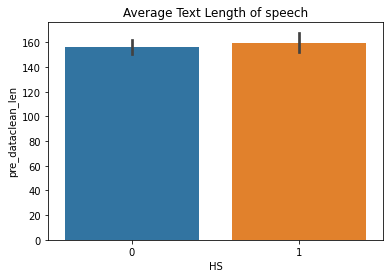

In [ ]:
sns.barplot('HS','pre_dataclean_len', data = dev)
plt.title('Average Text Length of speech')
plt.show()

### HS counts

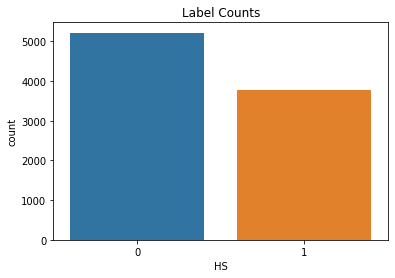

In [ ]:
sns.countplot(x= 'HS', data = train)
plt.title('Label Counts')
plt.show()

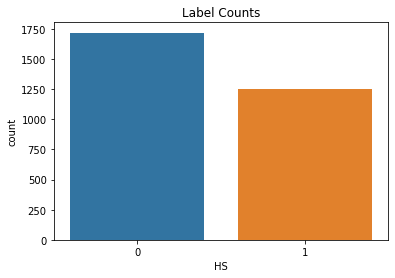

In [ ]:
sns.countplot(x= 'HS', data = test)
plt.title('Label Counts')
plt.show()

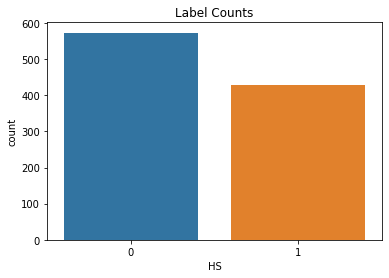

In [ ]:
sns.countplot(x= 'HS', data = dev)
plt.title('Label Counts')
plt.show()

### Average normal texts vs hate texts

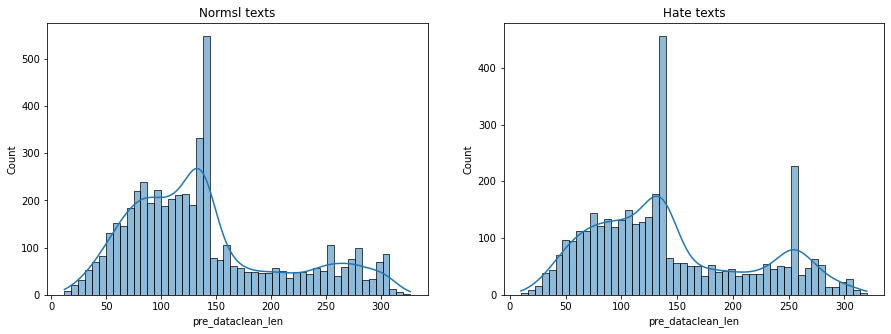

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(train[train["HS"] == 0]["pre_dataclean_len"],bins = 50,ax = ax1, kde=True).set(title = "Normsl texts")
sns.histplot(train[train["HS"] == 1]["pre_dataclean_len"],bins = 50,ax = ax2, kde = True).set(title = "Hate texts")
plt.show()

The distribution of both seems to be almost same. 100 to 150 characters in a text are the most common among both.

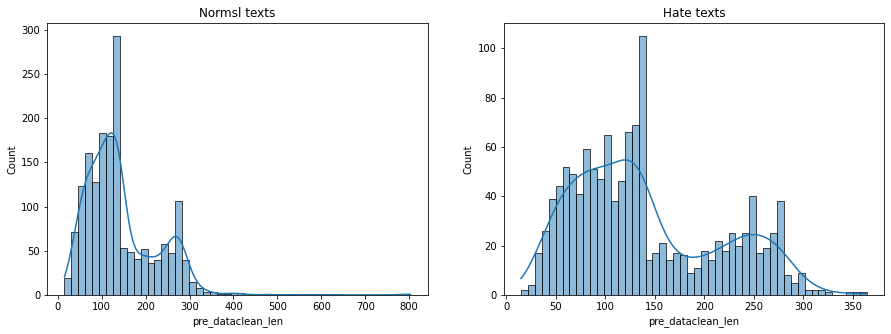

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(test[test["HS"] == 0]["pre_dataclean_len"],bins = 50,ax = ax1, kde=True).set(title = "Normsl texts")
sns.histplot(test[test["HS"] == 1]["pre_dataclean_len"],bins = 50,ax = ax2, kde = True).set(title = "Hate texts")
plt.show()

These two distributions are different, and 50-120 is the most in normal texts.  In hate texts, 50-140 was the most.

### Text lengths

The shortest, longest and mean text of train

In [ ]:
print(
    train['pre_dataclean_len'].min(),
    train['pre_dataclean_len'].max(),
    train['pre_dataclean_len'].mean()
)

10 327 139.99844444444443


In [ ]:
#Min length is 10, so let's see it
train[train['pre_dataclean_len']==10]

,id,text,HS,TR,AG,pre_dataclean_len
8696,8897,stfu bitch,1,1,1,10
8743,8944,Stfu pussy,1,1,1,10


In [ ]:
#Max length is 327, so let's see it
train[train['pre_dataclean_len']==327]

,id,text,HS,TR,AG,pre_dataclean_len
1868,2069,White Dragon Society &amp; Russia &amp; COM-12 &amp; Gnostic Illuminati &amp; CIA NSA MI6 FBI White Hat faction Alliance bounty on George Soros who funds all CIA Al-Qaeda DHS Muslim terrorist infiltrators &amp; free-welfare-money illegal immigrant voters for Obama's democrat party &amp; MS-13 assassins https://t.co/6SVHzS8iwD,0,0,0,327


In [ ]:
#Mean length is 140, so let's see it
train[train['pre_dataclean_len']==140]

,id,text,HS,TR,AG,pre_dataclean_len
33,234,The real truth is after Cologne and in the Nordic countries and Others no one trusts any refugees a better life for them doesn't mean 1. 4 u,1,0,0,140
34,235,"Federal judge to #Trump: ""imminent danger"" of ""irreparable injury to #refugees, visa-holders"", etc. @realDonaldTrump https://t.co/W9lEjzbtBF",0,0,0,140
38,239,two children washed up on a barb wired beach another scum photographer another attempt to get the EU to take more migrants enough propaganda,1,0,0,140
133,334,"@Daily_Record I bit my toungue when l heard Syrian refugees complain about Rothsey then again , maybe someone can swop them with a high rise",1,0,0,140
185,386,"@TelegraphNews We stand with the woman of Cologne ,Add France it seems young Arab Immigrants want to do a ISIS and abuse deport them or jail",0,0,0,140
...,...,...,...,...,...,...
8924,9125,@jojojoaugustine @nytimes Why when women are abused its called 'sexual assault' or 'rape' but when it's boys it's c… https://t.co/u22A9W5sfg,0,0,0,140
8933,9134,@TheLifeOfMeezus @MonicaLewinsky Dozens of other women I’ve accused him of rape and they either get paid off or nobody hears from them again,0,0,0,140
8943,9144,"Massive Crowd Cheers On As Pagans Kidnap Woman And Her Son, They Make The Son Rape His Mother, Th… https://t.co/Pb3m1cf85l via @walidshoebat",0,0,0,140
8948,9149,@JeriLRyan @linseygodfrey Lies! Women who came out of the gutter all of a sudden cry rape or abuse but traded it fo… https://t.co/t5For8SCow,0,0,0,140


The shortest, longest and mean text of test

In [ ]:
print(
    test['pre_dataclean_len'].min(),
    test['pre_dataclean_len'].max(),
    test['pre_dataclean_len'].mean()
)

15 803 140.7728037697745


In [ ]:
#Min length is 15, so let's see it
test[test['pre_dataclean_len']==15]

,id,text,HS,TR,AG,pre_dataclean_len
1190,31250,Get raped bitch,1,1,1,15
1961,31564,Bitch cunt dick,0,0,0,15


In [ ]:
#Max length is 803, so let's see it
test[test['pre_dataclean_len']==803]

,id,text,HS,TR,AG,pre_dataclean_len
2530,33005,"@FrancesannMaga @harperjeff30 @speakupsal @redbudacres @gary_w723 @MYSTERYSAIL @bellwetherdude @arkiegal411 @GOPMillenials @Ptrtldy1L @CynthiaRunnels1 @SunshineLK10 @brenda_lummus @Jetsta812 @TWGroupsWarrior @crimsonfaith88 @SmithsCoffeepot @CONNOR4TRUMP @DebbieTheMOTS @atillathehun412 @144000bound @ANONmonkywrench @TransformativeV @blacktulip966 @1Nvrdul @RR2A11 @protrumpuk @wolferkitten @patni1111 @Trina1732674 @chemist552 @joyreaper @hankcioffi @costman77 @BobC34019033 @bobhelps @JeffFromIowa @Ranger3079 @horse1157 Are you asking me if my statement on #IllegalAliens was a generalized statement @FrancesannMaga ? If your question is to me, yes, it was generalized,, I did not mean to profile ALL to be the same, but I think MANY illegals work the fields for plantations & are exploited doing so",0,0,0,803


In [ ]:
#Mean length is 141, so let's see it
test[test['pre_dataclean_len']==141]

,id,text,HS,TR,AG,pre_dataclean_len
73,34560,@unwhoretunately @CFissen this bitch nigga ain't even got the gal to @ me tryna get brian daddy dick actin like a… https://t.co/3u1gLSYtsC,0,0,0,141
281,33132,*calls you annoying and talks shit about you *proceeds to try to follow you on social media ??? Bitch I dont blame her. Fucking creepy hoe,1,1,0,141
605,30377,Screw diversity. American unity makes America stronger. The left wants a cacaphony of voices to weaken us. #BuildThatWall#IngrahamAngle #MAGA,1,0,1,141
663,32784,U.S.Sheriffs Fed Up as 25 Americans are Killed Each Day by Illegal Aliens @HouseGOP @SenateGOP#BuildTheWall #KeepAmericansSafe #DeportThemAll,1,0,1,141
882,31267,@RepMcSally Youve got this. Thank you for your service and commitment to keeping America safe and prosperous. #BuildThatWall @realDonaldTrump,0,0,0,141
1107,31052,Montana loves Trump. At the rally in Billings MT #MakeAmericaGreatAgain #MAGA #BuildThatWall #TrumpRally #BillingsMontana #billingstrumprally,0,0,0,141
1307,30649,"Whenever HP is on I have this sick need to watch it & bitch the whole time. Scene that grind my gears: ""HARRY DID U PUT UR NAME IN GOF!?""📢",0,0,0,141
1454,31369,Return the children to pedophiles and human trafficking in most cases OR don't cross border and mommies won't have that issue! #BuildThatWall,0,0,0,141
1835,33476,"Stop Looking at us asshole. You don't know me anymore. I know you 're a bitch since jhs. Sorry not sorry, but i'm a mother fucking bitch.🔥",0,0,0,141
2271,32464,Joanne: I'm the worst mother ever Me: Earlier you said I couldn't be a hoe because I give it away for free Joanne: HA! Bitch got no money,0,0,0,141


## Box plot

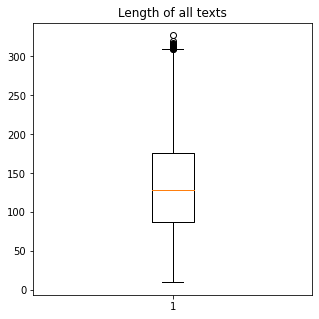

In [ ]:
#Box plot of all data
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train.pre_dataclean_len)
plt.title('Length of all texts')
plt.show()

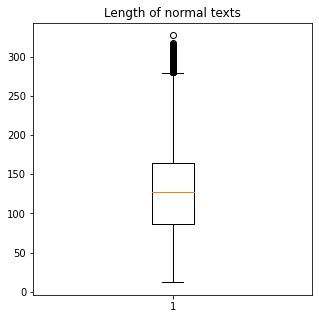

In [ ]:
#Box plot of normal texts
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train[train['HS']==0].pre_dataclean_len)
plt.title('Length of normal texts')
plt.show()

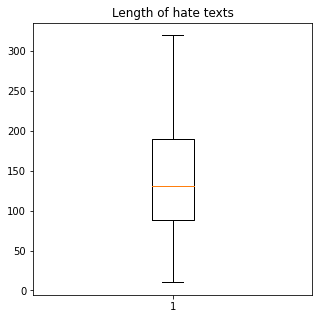

In [ ]:
#Box plot of hate texts
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train[train['HS']==1].pre_dataclean_len)
plt.title('Length of hate texts')
plt.show()

From above: There are quiet a lot outliers and the maximum length of the texts going beyond 330 in Normal texts; there are no ouliers and the maximum length of the texts are about 320 in hate texts.

## Wordcloud


A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

### Word cloud of all texts

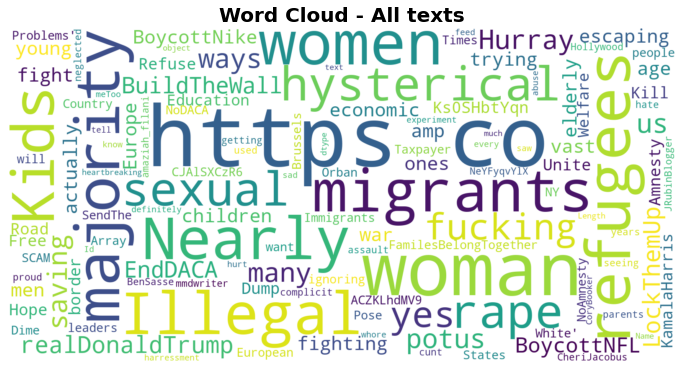

In [ ]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color= 'white').generate(str(train['text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - All texts',fontsize=20,fontweight='bold')
plt.show()

### Word cloud of normal texts

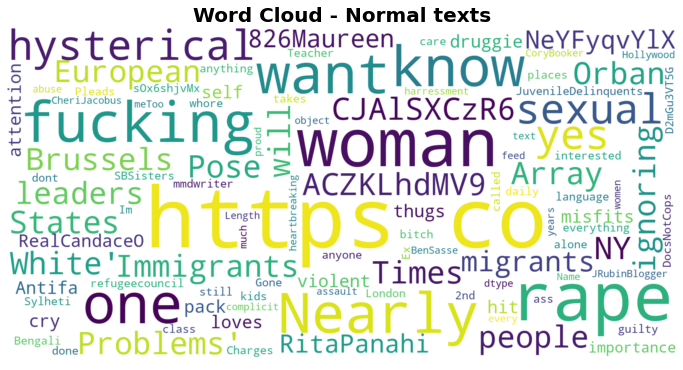

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color= 'white').generate(str(train[train['HS']==0]['text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Normal texts',fontsize=20,fontweight='bold')
plt.show()

### Word cloud of Hate texts

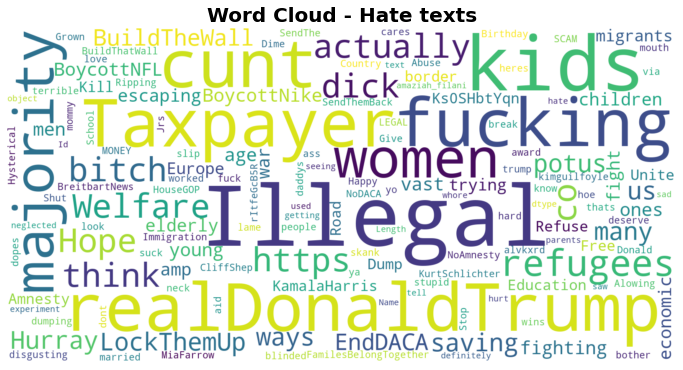

In [ ]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color= 'white').generate(str(train[train['HS']==1]['text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Hate texts',fontsize=20,fontweight='bold')
plt.show()

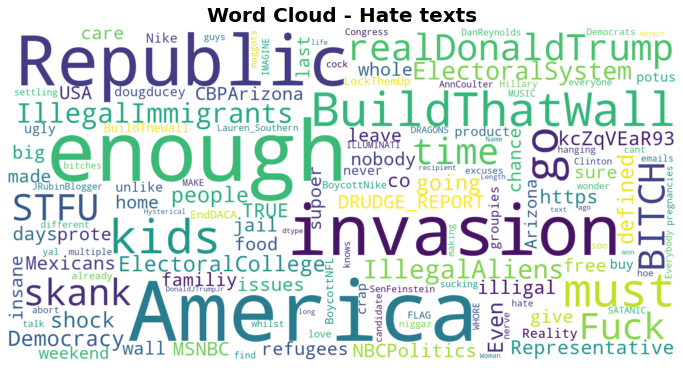

In [ ]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, background_color= 'white').generate(str(dev[dev['HS']==1]['text']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Hate texts',fontsize=20,fontweight='bold')
plt.show()

From above: Word cloud helps us find high-frequency words, and we've learned that 'Nearly' is the most commonly used, while in Hate texts, 'Illegal' is the most commonly used.

## Correlation Analysis

In [ ]:
# train dataset
corr_matrix = train.corr()
corr_matrix["pre_dataclean_len"].sort_values(ascending=False)

pre_dataclean_len    1.000000
AG                   0.139475
HS                   0.031317
TR                  -0.192677
id                  -0.421346
Name: pre_dataclean_len, dtype: float64

In [ ]:
# test data set
corr_matrix = test.corr()
corr_matrix["pre_dataclean_len"].sort_values(ascending=False)

pre_dataclean_len    1.000000
AG                   0.070564
id                  -0.013753
HS                  -0.016477
TR                  -0.265347
Name: pre_dataclean_len, dtype: float64

In [ ]:
# vaild data set
corr_matrix = dev.corr()
corr_matrix["pre_dataclean_len"].sort_values(ascending=False)

pre_dataclean_len    1.000000
AG                   0.046989
HS                   0.020506
TR                  -0.137234
id                  -0.179806
Name: pre_dataclean_len, dtype: float64

From correlation analysis, AG, HS and TR haven't correlation/ weak correlation with text length.

## Data Balancing

### Test Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hate Speech')

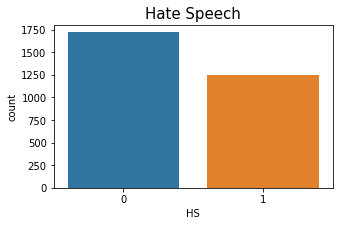

In [ ]:
# Check data balancing on Hate Speech result
plt.figure(figsize=(5, 3))
sns.countplot(test.HS.dropna(), order = test.HS.value_counts().index);
plt.title('Hate Speech', fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Targeted Rate')

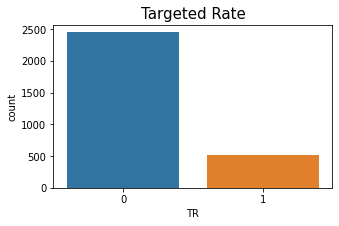

In [ ]:
# Check data balancing on Targeted Hate Speech
plt.figure(figsize=(5, 3))
sns.countplot(test.TR.dropna(), order = test.TR.value_counts().index);
plt.title('Targeted Rate', fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Aggresive Speech')

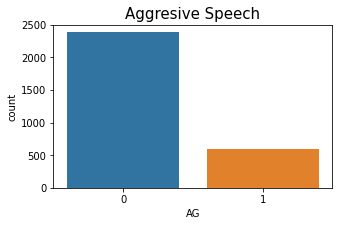

In [ ]:
# Check data balancing on Aggresive Speech
plt.figure(figsize=(5, 3))
sns.countplot(test.AG.dropna(), order = test.AG.value_counts().index);
plt.title('Aggresive Speech', fontsize = 15)

The HS data has a 58:42 imbalance ratio, and then we do not need to use oversampling or undersampling. These are called slightly imbalanced. 

Although AG and TR have imbalanced data, we do not need to do SMOTE to balance the data because the project's objective is only for hate speech (HS) detection.
 

### Train dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hate Speech')

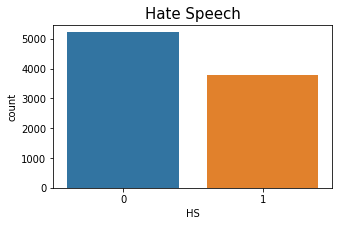

In [ ]:
# Check data balancing on Hate Speech result
plt.figure(figsize=(5, 3))
sns.countplot(train.HS.dropna(), order = train.HS.value_counts().index);
plt.title('Hate Speech', fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Targeted Rate')

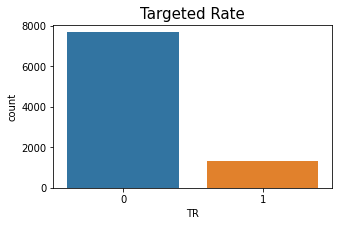

In [ ]:
# Check data balancing on Targeted Hate Speech
plt.figure(figsize=(5, 3))
sns.countplot(train.TR.dropna(), order = train.TR.value_counts().index);
plt.title('Targeted Rate', fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Aggresive Speech')

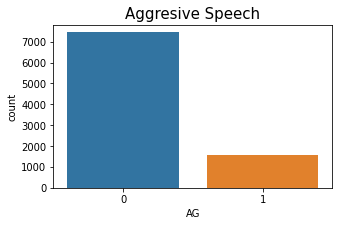

In [ ]:
# Check data balancing on Aggresive Speech
plt.figure(figsize=(5, 3))
sns.countplot(train.AG.dropna(), order = train.AG.value_counts().index);
plt.title('Aggresive Speech', fontsize = 15)

The HS data has a 58:42 imbalance ratio, and then we do not need to use oversampling or undersampling. These are called slightly imbalanced. 

Although AG and TR have imbalanced data, we do not need to do SMOTE to balance the data because the project's objective is only for hate speech (HS) detection.
 

**Vaild Dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hate Speech')

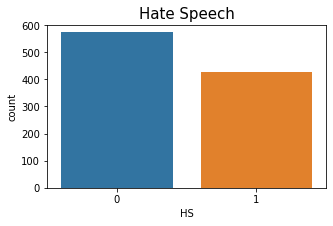

In [ ]:
# Check data balancing on Hate Speech result
plt.figure(figsize=(5, 3))
sns.countplot(dev.HS.dropna(), order = dev.HS.value_counts().index);
plt.title('Hate Speech', fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Targeted Rate')

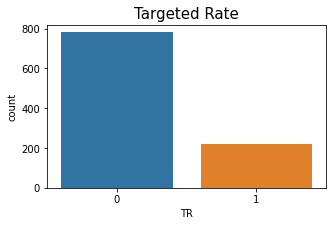

In [ ]:
# Check data balancing on Targeted Hate Speech
plt.figure(figsize=(5, 3))
sns.countplot(dev.TR.dropna(), order = dev.TR.value_counts().index);
plt.title('Targeted Rate', fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Aggresive Speech')

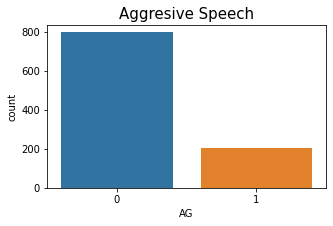

In [ ]:
# Check data balancing on Aggresive Speech
plt.figure(figsize=(5, 3))
sns.countplot(dev.AG.dropna(), order = dev.AG.value_counts().index);
plt.title('Aggresive Speech', fontsize = 15)

The HS data has a 58:42 imbalance ratio, and then we do not need to use oversampling or undersampling. These are called slightly imbalanced. 

Although AG and TR have imbalanced data, we do not need to do SMOTE to balance the data because the project's objective is only for hate speech (HS) detection.
 

# Data PreProcessing
After Descriptive Analysis of the Dataset, we now move onto cleaning and Pre Processing the Dataset

## Clean the data
All the following pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective.




*Lower Casing - The first we will do is to transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

*Removing excess letters, other twitter specific data (URLs, @mentions, 
hashtags) - Particularly in social media, these types of words are unique and must be removed, since they do not contribute much to actual meaning being conveyed in the sentence.

*Removing Short Words - We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

*Remove Html Tags - However, some HTML texts can also contain entities that are not enclosed in brackets, such as '&nsbm'. 

*Stopword Removal - A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). These are usually removed as a part of preprocessing since they do not convey any meaning, but instead, are used to provide fluidity to the sentence.

In [ ]:
import re
from sklearn.utils import resample
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()  #Lower Casing
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|([0-9])|@[\w]*", "", elem)) #Removing Noisy Texts
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', "", elem)) #Remove html tags
    df[text_field] = df[text_field].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))   #Removing Short Words
    df[text_field] = df[text_field].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))])) #Removing Stopwords
    
    
    df[text_field].apply(nltk.word_tokenize)        #apply tokenizer

    return df

test_clean = clean_text(test, 'text')       
train_clean = clean_text(train, 'text')      
dev_clean = clean_text(dev, 'text')        

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


###Decontract text
Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. 
**Removing contractions contributes to text standardization and is useful when we are working on Twitter data,** on reviews of a product as the words play an important role in sentiment analysis.

In [ ]:
import re
contractions_dict = {
        'didn\'t': 'did not',
        'don\'t': 'do not',
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he had / he would",
        "he'd've": "he would have",
        "he'll": "he shall / he will",
        "he'll've": "he shall have / he will have",
        "he's": "he has / he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how has / how is / how does",
        "I'd": "I had / I would",
        "I'd've": "I would have",
        "I'll": "I shall / I will",
        "I'll've": "I shall have / I will have",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it had / it would",
        "it'd've": "it would have",
        "it'll": "it shall / it will",
        "it'll've": "it shall have / it will have",
        "it's": "it has / it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she had / she would",
        "she'd've": "she would have",
        "she'll": "she shall / she will",
        "she'll've": "she shall have / she will have",
        "she's": "she has / she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as / so is",
        "that'd": "that would / that had",
        "that'd've": "that would have",
        "that's": "that has / that is",
        "there'd": "there had / there would",
        "there'd've": "there would have",
        "there's": "there has / there is",
        "they'd": "they had / they would",
        "they'd've": "they would have",
        "they'll": "they shall / they will",
        "they'll've": "they shall have / they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we had / we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what shall / what will",
        "what'll've": "what shall have / what will have",
        "what're": "what are",
        "what's": "what has / what is",
        "what've": "what have",
        "when's": "when has / when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where has / where is",
        "where've": "where have",
        "who'll": "who shall / who will",
        "who'll've": "who shall have / who will have",
        "who's": "who has / who is",
        "who've": "who have",
        "why's": "why has / why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you had / you would",
        "you'd've": "you would have",
        "you'll": "you shall / you will",
        "you'll've": "you shall have / you will have",
        "you're": "you are",
        "you've": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [ ]:
def expand_contractions(s, contractions_dict=contractions_dict):
     def replace(match):
         return contractions_dict[match.group(0)]
     return contractions_re.sub(replace, s)

In [ ]:
test_clean['text'] = test_clean['text'].apply(expand_contractions)
train_clean['text'] = train_clean['text'].apply(expand_contractions)
dev_clean['text'] = dev_clean['text'].apply(expand_contractions)

###Remove rare words
Now, we will remove rarely occurring words from the text.
Because they’re so rare, the association between them and other words is dominated by noise.
We can replace rare words with a more general form and then this will have higher counts.

In [ ]:
# Frequency of common words in test dataset
rare_top20_test = pd.Series(" ".join(test_clean['text']).split()).value_counts()[-20:]
print(rare_top20_test)

# Remove these top 20 common words
rare_test = list(rare_top20_test.index)
test_clean['text'] = test_clean['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_test))
test_clean['text'].head()

generalfed                            1
ohhhhh                                1
nomoreobamaitsnotyoureconomystupid    1
demlibidiots                          1
speeches                              1
winded                                1
narcissistic                          1
believing                             1
berlin                                1
ussr                                  1
tweezing                              1
osce                                  1
expectcheap                           1
apartwhen                             1
transit                               1
kingtae                               1
knowledge                             1
frontal                               1
skills                                1
thou                                  1
dtype: int64


0                                                                     bitch fucking cunt
1    rewatching breaking could hated bitch first time watched show skyler cunt fake wife
2                                                                        gobuildthatwall
3                                   harasses women calls bitch crabby block plays victim
4                               bitch aint gotta call phone matter fact hoes leave alone
Name: text, dtype: object

In [ ]:
# Frequency of common words in vaild dataset
rare_top20_valid = pd.Series(" ".join(dev_clean['text']).split()).value_counts()[-20:]
print(rare_top20_valid)

# Remove these top 20 common words
rare_vaild = list(rare_top20_test.index)
dev_clean['text'] = dev_clean['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_vaild))
dev_clean['text'].head()

brooklyn            1
electricity         1
conditioning        1
drinking            1
demo                1
lists               1
antitrump           1
infeuenc            1
glasgow             1
independence        1
budgie              1
celebratory         1
learned             1
evictions           1
solve               1
poll                1
percent             1
amnesty             1
banbusinesslobby    1
recipient           1
dtype: int64


0                                       swear getting places nick time exhausting schulman made flea created tourists home refugees welcome barcelona chose migrants visitors
1                                                                                                                       immigrant trump right immigration give insights story
2    illegalimmigrants illegalaliens electoralsystem electoralcollege going shock people america democracy america republic even defined america representative republic true
3                                                                                                                               report invasion issues mexicans buildthatwall
4                                                                                                          worker charged sexually molesting eight children immigrant shelter
Name: text, dtype: object

In [ ]:
test_clean['text'].head()

0                                                                     bitch fucking cunt
1    rewatching breaking could hated bitch first time watched show skyler cunt fake wife
2                                                                        gobuildthatwall
3                                   harasses women calls bitch crabby block plays victim
4                               bitch aint gotta call phone matter fact hoes leave alone
Name: text, dtype: object

###Tweets before and after cleaning
We will compare tweets before and after cleaning

In [ ]:
#Reload the raw data in order to compare with the cleaned data
train = pd.read_csv('/train_en.tsv', sep='\t')
test = pd.read_csv('/test_en.tsv', sep='\t', header=None, names=['id', 'text', 'HS', 'TR', 'AG'])

**1. Positive tweets before and after cleaning**

In [ ]:
# Example 1
print('BEFORE - ',train['text'][4])
print('AFTER - ',train_clean['text'][4])
print('')

BEFORE -  Orban in Brussels: European leaders are ignoring the will of the people, they do not want migrants https://t.co/NeYFyqvYlX
AFTER -  orban brussels european leaders ignoring people want migrants



In [ ]:
# Example 2
print('BEFORE - ',train['text'][20])
print('AFTER - ',train_clean['text'][20])
print('')

BEFORE -  @NBCNews @MSNBC @jacobsoboroff @DatelineNBC Close the tunnels with gunpowder !
AFTER -  close tunnels gunpowder



In [ ]:
# Example 3
print('BEFORE - ',test['text'][10])
print('AFTER - ',test_clean['text'][10])
print('')

BEFORE -  @FoxNews @BarackObama Like he ever kept out any threats. He's lying as usual. #BuildThatWall
AFTER -  like ever kept threats lying usual buildthatwall



In [ ]:
# Example 4
print('BEFORE - ',dev['text'][20])
print('AFTER - ',dev_clean['text'][20])
print('')

BEFORE -  calls trumpadministration stop separating immigrant children parents unitednations
AFTER -  calls trumpadministration stop separating immigrant children parents unitednations



**2. Negative tweets before and after cleaning**

In [ ]:
# Example 1
print('BEFORE - ',train['text'][98])
print('AFTER - ',train_clean['text'][98])
print('')

BEFORE -  This immigrant should be hung or shot! Period! Animal. https://t.co/wFcGoLCqJ5
AFTER -  immigrant hung shot period animal



In [ ]:
# Example 2
print('BEFORE - ',train['text'][201])
print('AFTER - ',train_clean['text'][201])
print('')

BEFORE -  @eScarry @vdare https://t.co/aldUrQnEcUKathryn Steinle, who was murdered by an illegal Mexican immigrant on July 1, 2015.
AFTER -  steinle murdered illegal mexican immigrant july



In [ ]:
# Example 3
print('BEFORE - ',test['text'][1])
print('AFTER - ',test_clean['text'][1])
print('')

BEFORE -  I'm rewatching Breaking Bad & I could see why I hated this bitch the first time I watched this show; Skyler is such a cunt & a fake as wife
AFTER -  rewatching breaking could hated bitch first time watched show skyler cunt fake wife



In [ ]:
# Example 4
print('BEFORE - ',dev['text'][1])
print('AFTER - ',dev_clean['text'][1])
print('')

BEFORE -  immigrant trump right immigration give insights story
AFTER -  immigrant trump right immigration give insights story



##Feature Extraction

###Tfidf Vectorizer

Tfidf Vectorizer- frequency inverse document frequency is a text vectorizer that transforms the text into a usable vector.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = 'english')

train_tfidf_model = vectorizer.fit_transform(train_clean.text)

test_tfidf_model = vectorizer.transform(test_clean.text)

In [ ]:
train_tfidf = pd.DataFrame(train_tfidf_model)
train_tfidf

,0
0,"(0, 1762)\t0.3612427044362548\n (0, 1760)\t0.3554400110377014\n (0, 4670)\t0.3092152639203841\n (0, 1981)\t0.24338882910501147\n (0, 8610)\t0.35024932491496075\n (0, 16003)\t0.3478456310216717\n (0, 12756)\t0.3843978807443003\n (0, 6931)\t0.443712747310327"
1,"(0, 4890)\t0.1722685279756786\n (0, 15218)\t0.19142446742498478\n (0, 9237)\t0.1352350083079199\n (0, 4469)\t0.21755115277382844\n (0, 169)\t0.2086417197751148\n (0, 11966)\t0.23502146246548472\n (0, 4536)\t0.3239378552671038\n (0, 2476)\t0.1637590474187105\n (0, 16267)\t0.11908538795682642\n (0, 8496)\t0.1257294582779808\n (0, 5372)\t0.21677768781312898\n (0, 4843)\t0.28612610066534905\n (0, 10300)\t0.21998165000165765\n (0, 8814)\t0.5005632192389541\n (0, 15657)\t0.28612610066534905\n (0, 5376)\t0.23310746027093054\n (0, 16484)\t0.2086417197751148"
2,"(0, 12962)\t0.29125106435111514\n (0, 9940)\t0.17748853999736816\n (0, 9962)\t0.1666872131816456\n (0, 12768)\t0.24144727079628914\n (0, 4011)\t0.27870401274888\n (0, 14523)\t0.2215852070333283\n (0, 3193)\t0.139458136828013\n (0, 5192)\t0.29125106435111514\n (0, 7029)\t0.11929592680499418\n (0, 16076)\t0.18498689070341318\n (0, 4493)\t0.21309280362865346\n (0, 5705)\t0.15341201417701253\n (0, 520)\t0.23103519234321643\n (0, 6805)\t0.17596008924413728\n (0, 15474)\t0.2628965971834794\n (0, 11984)\t0.21999794440909887\n (0, 8045)\t0.20096112520008313\n (0, 12442)\t0.22690308518954425\n (0, 1703)\t0.1535924510544775\n (0, 8037)\t0.16696474721065774\n (0, 4396)\t0.2524845187304067\n (0, 7044)\t0.16560131801666608\n (0, 8496)\t0.113042788758223"
3,"(0, 7100)\t0.21502307493825393\n (0, 11343)\t0.36422428264997603\n (0, 799)\t0.47873552302781414\n (0, 11125)\t0.432128686757823\n (0, 13900)\t0.31500842929609574\n (0, 16144)\t0.26050266991618415\n (0, 9788)\t0.3591335694035821\n (0, 14862)\t0.3303240439490311"
4,"(0, 15936)\t0.242281369502156\n (0, 10766)\t0.2246282395335759\n (0, 7013)\t0.4571366029501595\n (0, 8298)\t0.3756008364139223\n (0, 4892)\t0.37026086750954884\n (0, 1920)\t0.4318131116821492\n (0, 10373)\t0.4108200616973797\n (0, 9237)\t0.22014366536871696"
...,...
8995,"(0, 6954)\t0.4814070817472414\n (0, 11489)\t0.7631509749905009\n (0, 16258)\t0.4311006970704789"
8996,"(0, 6734)\t0.44633372505904106\n (0, 2881)\t0.4996733148601999\n (0, 874)\t0.40777034753625174\n (0, 13045)\t0.3778621443231548\n (0, 16439)\t0.3541661288149996\n (0, 11743)\t0.25985674716693663\n (0, 16267)\t0.22157877154914343"
8997,"(0, 5383)\t0.35471052181232293\n (0, 16166)\t0.15706378583305203\n (0, 3423)\t0.15135383677510367\n (0, 9811)\t0.32858769279443145\n (0, 5042)\t0.3201780202156333\n (0, 6934)\t0.2610611593704315\n (0, 12902)\t0.26793236217985034\n (0, 5789)\t0.34856599947591776\n (0, 15584)\t0.23908396443732063\n (0, 6486)\t0.20579890972852563\n (0, 14575)\t0.20103924326055572\n (0, 3674)\t0.2841673967822001\n (0, 5991)\t0.21616076417930785\n (0, 10601)\t0.21429928578282254\n (0, 8037)\t0.20334398687710153"
8998,"(0, 6954)\t0.6368744566145744\n (0, 16258)\t0.570321942910427\n (0, 8496)\t0.5187714409513752"


###Counting (Bag of Words BoW)

It not only checks if a word exists or not, but it also checks how many times a word has appeared. In sklearn we can use CountVectorizer to transform the text.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer() 
train_cve_model = vec.fit_transform(train_clean.text)

In [ ]:
train_cve = pd.DataFrame(train_cve_model)


In [ ]:
train_cve

In [ ]:
train_clean.head(5)

### Word Embeding(Word2Vec)

In [ ]:
token=[]
for i in train_clean['text']:
  token.append(word_tokenize(i.lower()))
train_clean['text']=pd.Series(token)  

In [ ]:
train_clean

,id,text,HS,TR,AG,pre_dataclean_len
0,201,"[hurray, saving, many, ways, lockthemup, buildthewall, enddaca, boycottnfl, boycottnike]",1,0,0,121
1,202,"[would, young, fighting, vast, majority, ones, escaping, can, not, fight, like, women, children, elderlyits, majority, refugees, actually, refugees, economic, migrants, trying, europe]",1,0,0,300
2,203,"[illegals, dump, kids, border, like, road, kill, refuse, unite, hope, amnesty, free, education, welfare, illegal, familesbelongtogether, country, taxpayer, dime, scam, nodaca, noamnesty, sendthe]",1,0,0,255
3,204,"[times, nearly, white, states, pose, array, problems, immigrants]",0,0,0,126
4,205,"[orban, brussels, european, leaders, ignoring, people, want, migrants]",0,0,0,122
...,...,...,...,...,...,...
8995,9196,"[proud, hysterical, woman]",0,0,0,73
8996,9197,"[hollywood, complicit, rape, sexual, assault, women, years]",0,0,0,95
8997,9198,"[filani, fucking, cunt, hate, seeing, kids, getting, neglected, used, parents, experiment, fucking, tell, ever, whore, definitely, hurt]",1,1,1,180
8998,9199,"[hysterical, woman, like]",0,0,0,33


In [ ]:
from gensim.models import Word2Vec

In [ ]:
train_model_embed = Word2Vec(size=100, window=5, min_count=3) 

In [ ]:
train_model_embed.build_vocab(train_clean['text'],progress_per=1000)

In [ ]:
train_model_embed.train(train_clean['text']
                        ,total_examples=train_model_embed.corpus_count
                        ,epochs=train_model_embed.epochs)

(365723, 466605)

In [ ]:
train_model_embed

In [ ]:
print(train_model_embed.wv.vocab)

In [ ]:
print(len(train_model_embed.wv.vocab))

In [ ]:
train_model_embed.wv.most_similar("dump")

# Implementation and Results

# 1- Building the first model 

In [ ]:
print(train_clean.shape, dev_clean.shape)

We now combine the pre-processed training and validation datasets and separate them while fitting the model.

In [ ]:
t_v = [train_clean, dev_clean]
train_valid = pd.concat(t_v)
train_valid.shape

In [ ]:
#Encoding and Padding the tweets and Factorising the HateSpeech(HS) column

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(train_valid['text'])
encoded_tweets = tokenizer.texts_to_sequences(train_valid['text'])
vocab_size = len(tokenizer.word_index)+1
padded_sequence = pad_sequences(encoded_tweets, maxlen=350)
#HateSpeech = train_valid.HS.factorize()
HateSpeech=np.array(train_valid['HS'])

In [ ]:
#Separating the X and the y sequences to build the model
X_train, y_train = padded_sequence , HateSpeech

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
encoded_tweets_test = tokenizer.texts_to_sequences(test_clean['text'])
padded_sequence_test = pad_sequences(encoded_tweets_test, maxlen=350)

In [ ]:
padded_sequence_test

In [ ]:
X_test=padded_sequence_test
y_test=np.array(test_clean['HS'])

In [ ]:
X_test

In [ ]:
y_test

# Model 1

In [ ]:
# create the model
max_review_length=2000
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=350))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())



In [ ]:
model.fit(X_train, y_train, epochs=5,validation_split = 0.1, batch_size=64)

# Prediction 1

In [ ]:
X1 = model.predict(X_test)

In [ ]:
X1

# Confusion Matrix 1

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_true=np.array(test_clean['HS'])
y_pred=np.array(X1)

In [ ]:
y_pred = np.where(X1 > 0.5, 1, 0)
print(y_pred)

In [ ]:
print(confusion_matrix(y_true, y_pred))

In [ ]:
print(classification_report(y_true, y_pred))

# Plot confusin martix 1

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['not offensive','offensive']

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# 2- Implement the second model

In [ ]:
train_clean.head(2)

In [ ]:
train_clean.shape

In [ ]:
# first applying Tokenenizing, test2seqence, pad sequence to our trainind and testing data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_num_word=20000
max_length=350

tokenizer=Tokenizer(num_words=max_num_word)
tokenizer.fit_on_texts(list(train_clean['text']))
#tokenizer.fit_on_texts(list(dev_clean_imb['text']))





In [ ]:
list_tokenized_train=tokenizer.texts_to_sequences(train_clean['text'])
list_tokenized_dev=tokenizer.texts_to_sequences(dev_clean['text'])

In [ ]:
from pandas._libs.algos import pad_2d_inplace
X_tr=pad_sequences(list_tokenized_train,maxlen=max_length)
X_dev=pad_sequences(list_tokenized_dev,maxlen=max_length)

In [ ]:
X_tr

In [ ]:
y_tr=np.array(train_clean['HS'])
y_dev=np.array(dev_clean['HS'])

# Model 2

In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, Bidirectional,Embedding,Flatten,GRU


In [ ]:
from tensorflow.keras.optimizers import SGD,RMSprop
from pandas.core.common import random_state
# create our model
opt=RMSprop(lr=0.001)
model2=Sequential()
model2.add(Embedding(vocab_size,50,input_length=350))
model2.add(Bidirectional(LSTM(units=250,return_sequences=True)))
model2.add(Flatten())
model2.add(Dense(400,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
model2.summary()

#the last output layer
#Adam: stochadtic gradient decent optimzer
#binary_crossentropy because we have a binary classes classification task

Use a Manual Verification Dataset

In [ ]:
hist=model2.fit(X_tr,y_tr,validation_data=(X_dev,y_dev),epochs=5,batch_size=132)

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

# Prediction 2

In [ ]:
test_clean.shape

In [ ]:
# first applying Tokenenizing, test2seqence, pad sequence to our trainind and testing data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_num_word=40000
max_length=350

tokenizer_test=Tokenizer(num_words=max_num_word)
tokenizer_test.fit_on_texts(list(test_clean['text']))
#tokenizer.fit_on_texts(list(dev_clean_imb['text']))





In [ ]:
list_tokenized_test=tokenizer_test.texts_to_sequences(test_clean['text'])


In [ ]:
from pandas._libs.algos import pad_2d_inplace
X_tst=pad_sequences(list_tokenized_test,maxlen=max_length)


In [ ]:
X2 = model2.predict(X_tst)

In [ ]:
X2

# Confusion Matrix 2

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_true=np.array(test_clean['HS'])
y_pred=np.array(X2)

In [ ]:
y_pred = np.where(X2 > 0.5, 1, 0)
print(y_pred)

In [ ]:
print(confusion_matrix(y_true, y_pred))


In [ ]:
print(classification_report(y_true, y_pred))

# Plot confusin martix 2

In [ ]:
cm2 = confusion_matrix(y_true=y_true, y_pred=y_pred)

In [ ]:
cm_plot_labels = ['not offensive','offensive']

In [ ]:
plot_confusion_matrix(cm=cm2, classes=cm_plot_labels, title='Confusion Matrix')

# Error Analysis

In [ ]:
encoded_tweets_test = tokenizer.texts_to_sequences(test_clean['text'])
padded_sequence_test = pad_sequences(encoded_tweets_test, maxlen=350)

print(padded_sequence_test)

X_test2=padded_sequence_test
y_test2=np.array(test_clean['HS'])
print(X_test2.shape)
print(y_test2.shape)

In [ ]:
Xtest3 = model2.predict(X_test2)

In [ ]:
test_clean['predict_model11'] = np.where(X1 > 0.5, 1, 0) # Model 1
test_clean['predict_model12'] = np.where(Xtest3 > 0.5, 1, 0) # Model 2

test_clean.head()

test_clean.to_excel('error_analysis.xlsx', sheet_name='sheet1', index=False)